
## Assignment 7 – Applied: Forecasting of Sales per Product Category
**Week 7 Topic:** Tree-Based Methods – Decision Tree, Random Forest, and XGBoost  

### Business Context
Retailers rely on forecasting to optimize inventory and anticipate demand. In this assignment, you will forecast monthly sales per product category using tree-based ensemble learning techniques.


### Step 1: Load and Inspect the Dataset

In [5]:

import pandas as pd

# TODO: Load dataset
df = pd.read_csv(r'C:\Users\sarah\Desktop\BC\Fall 2025\MESA8414 Applied AI and Machine Learning\Assignment\Week 7 assignment\store_data.csv') 

# TODO: Convert date column to datetime (day-first)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')

# Display info
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Step 2: Data Preprocessing and Aggregation

In [7]:

# TODO: Aggregate monthly sales by category
df['Month'] = df['Order Date'].dt.to_period('M')   

monthly_sales = df.groupby(['Month', 'Category'])['Sales'].sum().reset_index()   

monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

monthly_sales.head()


,Month,Category,Sales
0,2015-01-01,Furniture,6217.277
1,2015-01-01,Office Supplies,4845.140
2,2015-01-01,Technology,3143.290
3,2015-02-01,Furniture,1839.658
4,2015-02-01,Office Supplies,1071.724


### Step 3: Prepare Features and Target

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
monthly_sales['Category_Code'] = le.fit_transform(monthly_sales['Category'])   

X = monthly_sales[['Category_Code']]  
y = monthly_sales['Sales']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   


### Step 4: Decision Tree Regressor

In [9]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# TODO: Train Decision Tree model
tree = DecisionTreeRegressor(random_state=42)   ### FILL IN BLANK
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

# Evaluate
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree - MAE:", mae_tree, "RMSE:", rmse_tree, "R2:", r2_tree)


Decision Tree - MAE: 7417.404052305391 RMSE: 8537.085720439585 R2: -0.09769693559061143


**Interpretation Question:** Which features does the tree rely on most for splitting, and why might this be useful for category-level sales trends?

The tree currently only relies on category_code because it is the only predictor. It is useful for category-level sales trends because, using category_code as the only predictor, it partitions each category into smaller groups with similar characteristics. 

### Step 5: Random Forest Regressor

In [10]:

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)  
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - MAE:", mae_rf, "RMSE:", rmse_rf, "R2:", r2_rf)


Random Forest - MAE: 7387.985359142864 RMSE: 8532.948129221291 R2: -0.0966331719765916


**Conceptual Question:** How does bagging help improve performance in Random Forests compared to a single Decision Tree?

Bagging helps improve performance in Random Forests compared to a single Decision Tree by reducing the variance. Each tree in the Random Forest is trained on a different random sample, which is then combined at the end, reducing the overall variance. 

In [12]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 1.3/56.8 MB 8.4 MB/s eta 0:00:07
   -- ------------------------------------- 2.9/56.8 MB 7.6 MB/s eta 0:00:08
   --- ------------------------------------ 5.5/56.8 MB 9.9 MB/s eta 0:00:06
   ------ --------------------------------- 8.9/56.8 MB 11.3 MB/s eta 0:00:05
   -------- ------------------------------- 12.3/56.8 MB 12.6 MB/s eta 0:00:04
   ----------- ---------------------------- 16.8/56.8 MB 13.9 MB/s eta 0:00:03
   --------------- ------------------------ 21.5/56.8 MB 15.3 MB/s eta 0:00:03
   ------------------ --------------------- 26.2/56.8 MB 16.1 MB/s eta 0:00:02
   --------------------- ------------------ 30.7/56.8 MB 16.9 MB/s eta 0:00:02
   ------------------------- -------------- 35.7/56.8 MB 17.4 MB/s eta 0:00:02
   ---------------------------- ----------- 40.1/56.8 MB 17.7 MB/s eta 0:00:01
   ------------------------------ --------- 43.3/56.8 MB 17.6 MB/s e

### Step 6: XGBoost Regressor

In [13]:

from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)   ### FILL IN BLANKS
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost - MAE:", mae_xgb, "RMSE:", rmse_xgb, "R2:", r2_xgb)


XGBoost - MAE: 7417.40132429957 RMSE: 8537.08327764383 R2: -0.0976963074022299


**Reflection Question:** Why might boosting perform better on smaller datasets, and what role does the learning rate play in controlling model complexity?

There are a couple of reasons why boosting may perform better on smaller datasets. The first is that boosting uses sequential learning as opposed to parallel. This means that Trees depend on one another and make corrections after each one. Therefore, it may work better than parallel learning with smaller datasets. The learning rate controls model complexity by controlling how much each new tree contributes to learning. High learning rates mean that each tree contributes a lot and, therefore, may make the model complex. Low learning rates mean that while models learn slowly, it would need more trees to get to the same predictive power. 

### Step 7: Model Performance Comparison

In [14]:

results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'MAE': [mae_tree, mae_rf, mae_xgb],
    'RMSE': [rmse_tree, rmse_rf, rmse_xgb],
    'R2': [r2_tree, r2_rf, r2_xgb]
})
results


,Model,MAE,RMSE,R2
0,Decision Tree,7417.404052,8537.085720,-0.097697
1,Random Forest,7387.985359,8532.948129,-0.096633
2,XGBoost,7417.401324,8537.083278,-0.097696


### Step 8: Feature Importance Visualization

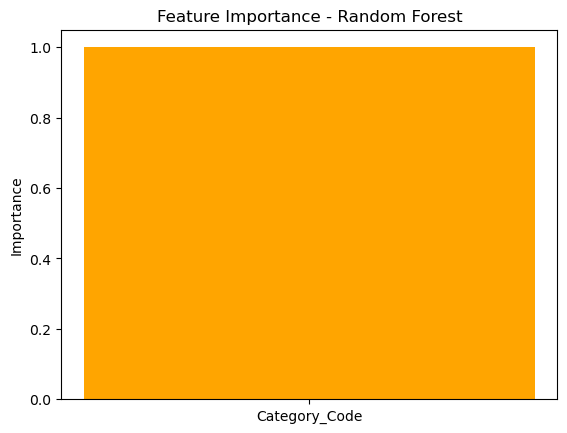

In [15]:

import matplotlib.pyplot as plt

importances = rf.feature_importances_ 
plt.bar(['Category_Code'], importances, color='orange') 
plt.title('Feature Importance - Random Forest')
plt.ylabel('Importance')
plt.show()


### Step 9: Reflection and Discussion
**Q1.** Which of the three models performed best, and why?  

Random Forest performed best. It has the lowest MAE and RMSE. 

**Q2.** If additional variables (like Region, Segment, or Month) were added, how might model performance change?  

If additional variables were added, I think the model performance could improve. Currently, the R^2 values are very low and negative, which indicates poor predictive power of the predictor Category_code. Adding more variables in the model provide context and explanatory power could improve model performance. 

**Q3.** In what types of business scenarios would you prioritize interpretability over accuracy?  

I think that business scenarios in which the transparency of decision-making is important would prioritize interpretability over accuracy. For example, in cases of credit scoring or loan approval, you would need to communicate to the clients why they have received the scores they did and the reasons for approving/denying loans. In this case, you would need to be transparent about the metrics used for the decision-making and be able to interpret the results to clients of any financial literacy. 

**Q4.** How can tree-based methods assist managers in understanding key sales drivers?  

Tree-based methods can assist managers in identifying and ranking key drivers of sales so they can prioritize and plan sales strategies accordingly. 